Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Christopher Lamberg"
STUDENTID = "12212658"
GROUPID = "1";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

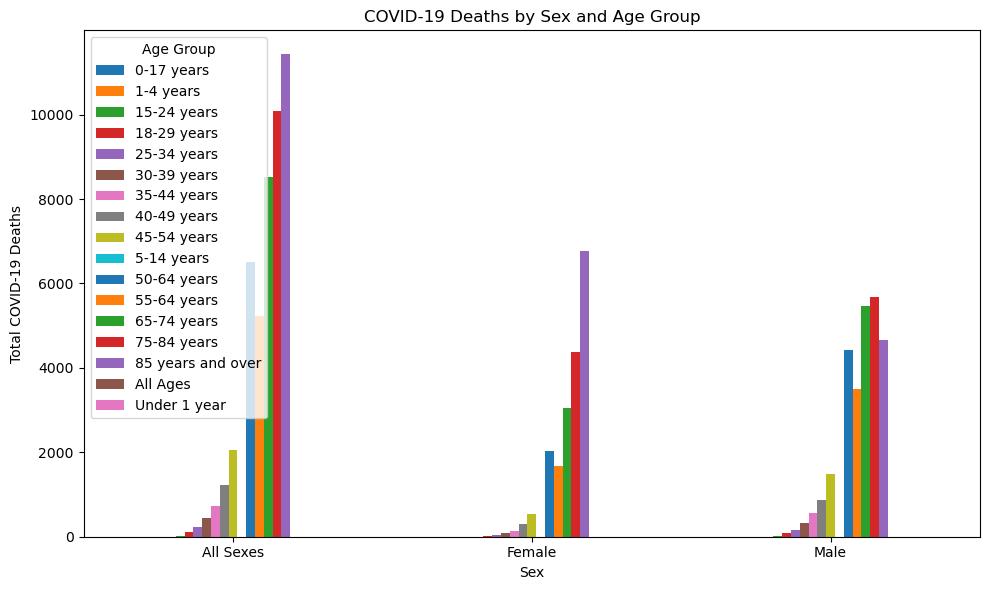

In [2]:
# YOUR CODE HERE
import pandas as pd
import requests
import matplotlib.pyplot as plt

dataset = requests.get("https://raw.githubusercontent.com/pavle3WU/group1/main/filtered_new_york_2020.json")    #load the url
data = dataset.json()    #make sure the url is read as json

df = pd.DataFrame(data)     #turning it into a pandas df
#naming the columns:
df.columns = ["metadata column1","metadata column2","metadata column3","metadata column4","metadata column5", "metadata column6",
              "metadata column7", "metadata column8","Data As Of", "Start Date", "End Date", "Group", "Year", "Month", "State", "Sex", "Age Group", "COVID-19 Deaths", "Total Deaths",
              "Pneumonia Deaths", "Pneumonia and COVID-19 Deaths", "Influenza Deaths", "Pneumonia, Influenza, or COVID-19 Deaths", "Footnote"]  
cols_to_convert = [
    "COVID-19 Deaths", "Total Deaths", "Pneumonia Deaths",
    "Pneumonia and COVID-19 Deaths", "Influenza Deaths",
    "Pneumonia, Influenza, or COVID-19 Deaths"
]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(",", "")     #converting nummeric columns into floats so that python can create plots 
    df[col] = pd.to_numeric(df[col], errors="coerce")    #https://stackoverflow.com/questions/48094854/pandas-convert-data-type-from-object-to-float

    
cat_cols = ["Sex", "Age Group", "State", "Month", "Year"]     #also converting these columns into categoric values so we can work with them

for col in cat_cols:
    df[col] = df[col].astype("category")
    
df = df[df['Age Group'] != 'All Ages']    #deleting the "all ages" rows for better visualisation

plot_groups = df.groupby(["Sex", "Age Group"])["COVID-19 Deaths"].sum().unstack()    #grouping the categories for the plot
plot_groups.plot(kind='bar', figsize=(10, 6))                                 #ploting https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
plt.title("COVID-19 Deaths by Sex and Age Group")                           #https://www.youtube.com/watch?v=qxADlcqBXq4
plt.xlabel("Sex")
plt.ylabel("Total COVID-19 Deaths")
plt.legend(title="Age Group")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

1) 

According to Saket et al. (2019), the task supported by my chosen visualization—a grouped bar chart of COVID-19 deaths by age group and sex—aligns with the “Find Clusters” task. This task involves identifying groups of similar values within the data, such as patterns or trends across demographic categories. 

2)

The grouped bar chart is effective for the “Find Clusters” task because it enables easy visual comparison across multiple categorical variables—in this case, age group and sex. According to Saket et al. (2019), bar charts are among the most accurate and fastest visualization types for identifying clusters, and they were also highly preferred by users. This is likely because bar charts use length encoding, which humans can interpret easily and accurately(Page 5). In my visualization, the grouped bars clearly display similarities and differences in COVID-19 death counts across demographic groups, making it straightforward to detect patterns such as which age-sex combinations experience higher or lower mortality. This aligns with the study’s recommendation: “Use bar charts for finding clusters,”(Page 5) as bar charts outperformed other visualizations in both speed and accuracy for this task.

3)

The visualization displays the total number of COVID-19 deaths by age group and sex using a grouped bar chart. Each group on the x-axis represents a sex category—All Sexes, Female, and Male—while the colored bars within each group represent different age ranges. This allows for easy comparison of mortality patterns across age and gender. The chart clearly highlights that older age groups, particularly those aged 75 and above, experienced significantly higher death counts. It is also clearly visible that there are still differences among mortality rates in between the same age groups among the sexes. For an example, there are twice as many Covid-19 deaths in the age group 50-64 for males then for females. The category "All Ages" has intentionally been deleted to not disturbt the scale.

4)

This visualisation contributes to answering the project question, because it shows us, that there are visually significant differences between some age groups in covid-19 deaths. So when compering the deaths to weather in New York, we should not ignore that fact. It is also visible that the gender has an impact on the mortality rates across the age groups. In conclusion, the visualisation shows us that the weather isn't going to be the only variable impacting Covid-19 deaths and that there are many other factors that we should keep in mind.


------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

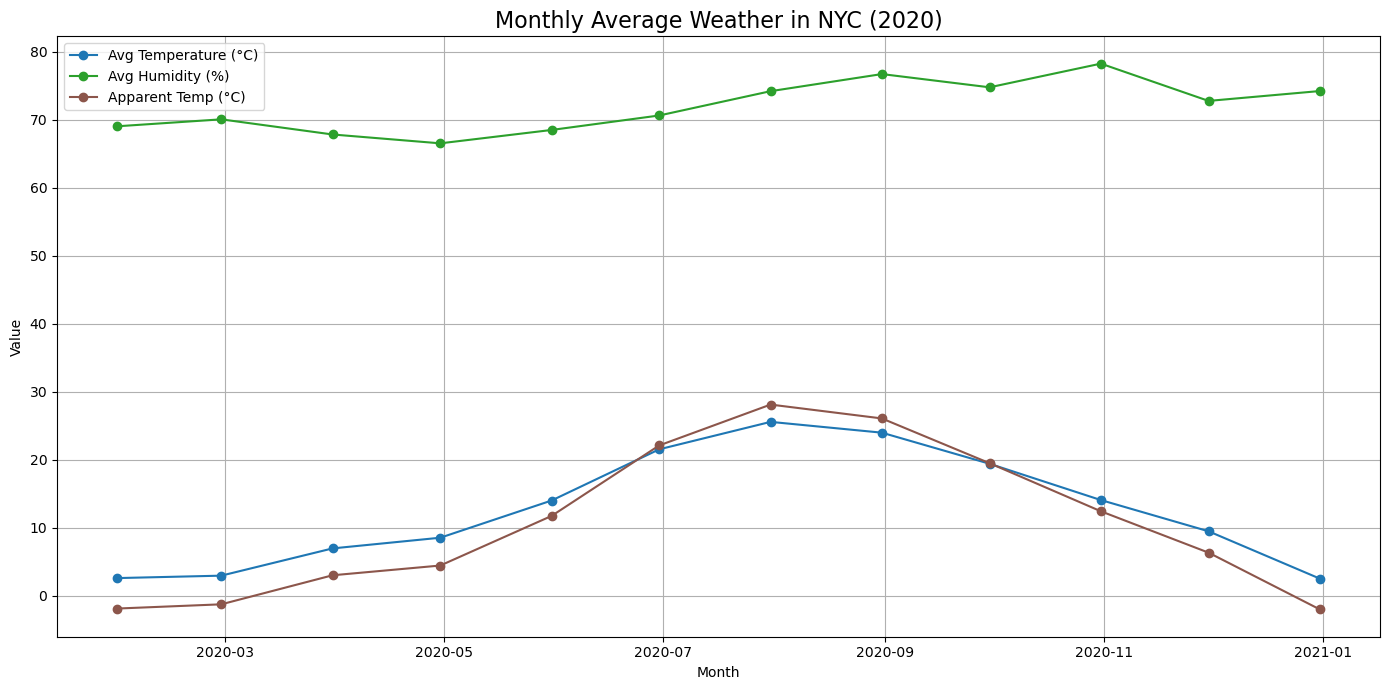

In [3]:
# YOUR CODE HERE
import pandas as pd
import requests
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/pavle3WU/group1/refs/heads/main/open-meteo_no_head.csv"
weather_df = pd.read_csv(url)
weather_df.head()



weather_df.columns = [
    'time', 'temperature_2m', 'relative_humidity_2m', 'weather_code',
    'rain_mm', 'snowfall_cm', 'apparent_temperature',
    'pressure_msl', 'surface_pressure'
]



weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df.set_index('time', inplace=True)

# Resample by month and calculate mean
monthly_weather = weather_df.resample('M').mean().reset_index()



plt.figure(figsize=(14,7))

plt.plot(monthly_weather['time'], monthly_weather['temperature_2m'], label='Avg Temperature (°C)', color='tab:blue', marker='o')
plt.plot(monthly_weather['time'], monthly_weather['relative_humidity_2m'], label='Avg Humidity (%)', color='tab:green', marker='o')
plt.plot(monthly_weather['time'], monthly_weather['apparent_temperature'], label='Apparent Temp (°C)', color='tab:brown', marker='o')




plt.title("Monthly Average Weather in NYC (2020)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?

According to Saket et al. (2019), the task supported by the Line charts that show the distribution of 3 types of weather measurements (temperature in Celsius, apparent temparature in Celsius and humidity) across all months in 2020 aligns with the “Characterize distribution” task. According to the study, line charts were significantly more accurate for distribution tasks than for other visualisations.

Why is the chosen visualisation effective for the given task?

Saket et al. (2019) found that line charts were significantly more accurate than other chart types for the “Characterize Distribution” task. This is because line charts effectively show trends over time, which enables users to observe how values increase, decrease, or remain stable. In this dataset, the line chart helps us observe how weather conditions are distributed over the first months of the COVID-19 pandemic and how they change. The research also highlights that participants preferred line charts for distribution tasks, which reinforces their usability and interpretability in such contexts. Unlike pie charts or tables, line charts preserve temporal continuity, which is key for recognizing patterns in time-series data.

What does the visualisation show exactly?

The chart displays the monthly average values for three weather variables in New York City for the year 2020: temperature, relative humidity, and apparent (or "feels-like") temperature. The x-axis shows the timeline from January to December 2020, while the y-axis shows the value scale for the variables. It clearly shows a typical temperate climate cycle, with temperature and apparent temperature peaking around July–August and dropping towards the winter. Humidity shows less fluctuation, maintaining a relatively stable range across months with slight increases in summer. The comparison between actual and apparent temperature also adds insight into human-perceived climate conditions. To sum up, the graph provides a comprehensive overview of the city’s environmental conditions during the first year of the COVID-19 pandemic.

What does the visualisation contribute to answering your project's questions?

The visualisation contributes to the project by clearly summarising how key weather variables—temperature, humidity, and apparent temperature—change over the course of a year in New York City. By aggregating hourly weather data into monthly averages, the chart reduces complexity while preserving meaningful seasonal trends. This helps identify the timing and intensity of shifts in weather conditions, such as the peak of summer heat or the lowest winter temperatures. By summarising monthly patterns in temperature and humidity, one can make further comparison with COVID-19 mortality trends across the same timeline. If, for instance, spikes in COVID-19 deaths correlate with colder months or periods of high humidity, this weather trend visualisation can reveal such overlaps. It thus provides a critical component of the analysis, helping to explore potential relationships or hypotheses about how weather factors may have influenced COVID deaths.

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

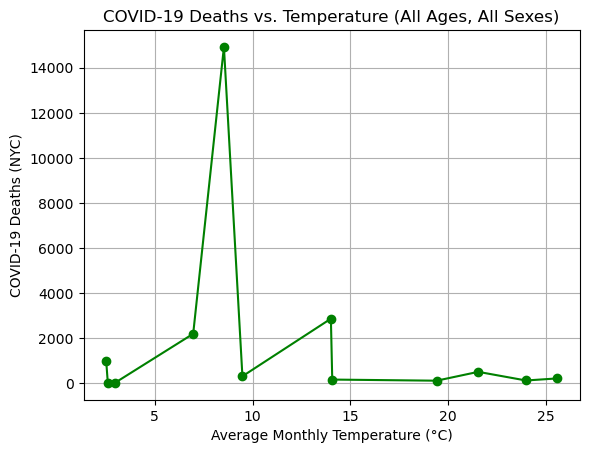

In [2]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
csv_url = "https://raw.githubusercontent.com/pavle3WU/group1/refs/heads/main/open-meteo_no_head.csv"
df_csv = pd.read_csv(csv_url)

json_url = "https://raw.githubusercontent.com/pavle3WU/group1/main/filtered_new_york_2020.json"
df_json = pd.read_json(json_url)
df_json.drop([0,1,2,3,4,5,6,7,8,9,11,], axis=1, inplace=True) # removing unnecessairy or artificialy created columns

df_csv['time'] = pd.to_datetime(df_csv['time']) # matching the date format
df_csv['month'] = df_csv['time'].dt.to_period('M') 

df_json[10] = pd.to_datetime(df_json[10]) # matching the date format
df_json['month'] = df_json[10].dt.to_period('M')


df_csv_avg = df_csv.groupby('month').mean(numeric_only=True).reset_index() # hourly data -> monthly averages

df_combo = pd.merge(df_csv_avg, df_json, on='month', how='left') # merging the data and renaming columns
df_combo.rename(columns={"temperature_2m (°C)": "temp (C°)", "relative_humidity_2m (%)": "humidity(%)","weather_code (wmo code)":"wmo code","apparent_temperature (°C)":"app_temp(C°)"}, inplace=True)
df_combo.drop([10,12,13,23], axis=1, inplace=True)
df_combo.rename(columns={14: "State or City",15:"Sexes",16:"Age",17:"COVID-19 Deaths",18:"Total Deaths",19:"Pneumonia Deaths",20:"Pneumonia and COVID-19 Deaths",21:"Influenza Deaths",22:"Pneumonia, Influenza, or COVID-19 Deaths"}, inplace=True)

df_all = df_combo[(df_combo['Sexes'] == 'All Sexes') & (df_combo['Age'] == 'All Ages') & (df_combo['State or City'] == 'New York City')]

df_all_sorted = df_all.sort_values(by="temp (C°)")
plt.plot(df_all_sorted["temp (C°)"], df_all_sorted["COVID-19 Deaths"], color='green', marker='o', linestyle='solid')
plt.xlabel("Average Monthly Temperature (°C)")
plt.ylabel("COVID-19 Deaths (NYC)")
plt.title("COVID-19 Deaths vs. Temperature (All Ages, All Sexes)")
plt.grid(True)
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

1) The task is is supported by this visualization of COVID-19 Deaths vs Temperature (All Ages, All Sexes), as according to Saket et al. (2019), a line chart is the best representation for "Find Correlation" tasks.

2) A line chart is effective for "Find Correlation" tasks as it depicts changes in both variables in an easily tracable way. Saket et al. (2019) has the line chart and the scatterplot as best and second best method at accurately and quickly identifying correlations, but the line chart is much more prefered by users.

3) The visualization shows average monthly temperature of NYC on the x and monthly COVID-19 death counts on the y-axis. Each data point represents one month of the year 2020, not ordered by month but by increasing temperature. The chart shows no clear negative relationship. The coldest 6 months have on average more deaths than the rest. But there also is a big spike for one of these months, shifting the mean heavily.

4) The visualisation contributes by providing a illustration of potential relationships. It shows that death counts do tend to be higher in months with lower temperature. It also serves as a visual guide or starting point for more in depht analysis or further comparison to other desease related deathcounts.

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [3]:
# YOUR CODE HERE
import csv
import os

folder_path = "./data"  # data folder in same environment as notebook
if not os.path.exists(folder_path):
    os.makedirs(folder_path) # creates data folder if not existing
filepath = os.path.join(folder_path, "data_notebook-1_mergeddata.csv")  # dataset name

with open(filepath, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(df_combo.columns)  # writes columns
    for row in df_combo.itertuples(index=False):  # reads every row
        writer.writerow(row)